# Decision Tree Model Experimentation and Tuning for Diabetes Prediction

This notebook explores various parameters for tuning a Decision Tree model using a diabetes dataset. We will experiment with `max_depth`, `min_samples_split`, and `min_samples_leaf` to find the best-performing model, followed by evaluating its performance.


## Data Loading and Preparation

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset (adjust path as needed)
data = pd.read_csv('../data/processed/cleaned_diabetes_one_hot_encoding.csv')

# Splitting the data into features and target
X = data.drop(columns=['diabetes'])
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Experiment 1: Varying `max_depth`

Here, we explore how different values of `max_depth` impact the performance of the Decision Tree model.


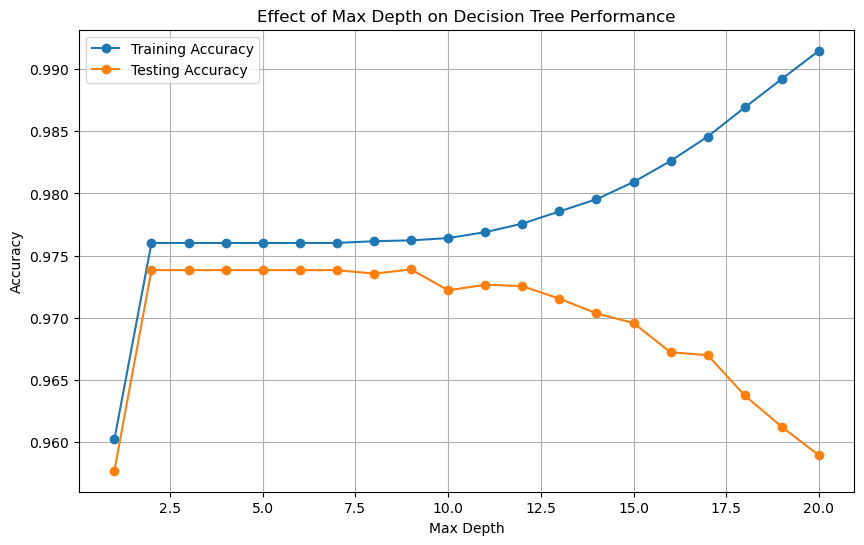

In [14]:
depths = range(1, 21)
train_scores = []
test_scores = []

for depth in depths:
    decision_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    decision_tree.fit(X_train, y_train)
    train_scores.append(decision_tree.score(X_train, y_train))
    test_scores.append(decision_tree.score(X_test, y_test))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, marker='o', label='Training Accuracy')
plt.plot(depths, test_scores, marker='o', label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Effect of Max Depth on Decision Tree Performance')
plt.legend()
plt.grid()
plt.show()


## Experiment 2: Varying `min_samples_split`

In this section, we investigate how changing `min_samples_split` affects the Decision Tree model's accuracy.


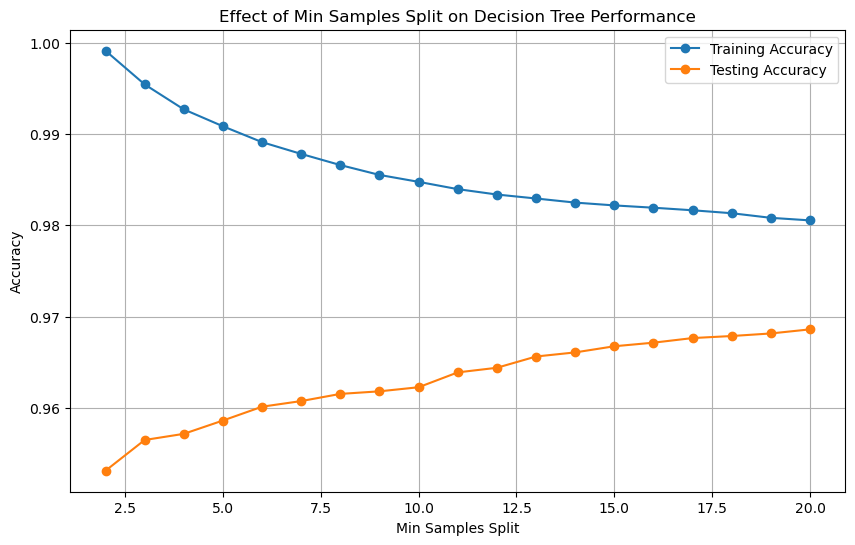

In [18]:
splits = range(2, 21)
train_scores = []
test_scores = []

for split in splits:
    decision_tree = DecisionTreeClassifier(min_samples_split=split, random_state=42)
    decision_tree.fit(X_train, y_train)
    train_scores.append(decision_tree.score(X_train, y_train))
    test_scores.append(decision_tree.score(X_test, y_test))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(splits, train_scores, marker='o', label='Training Accuracy')
plt.plot(splits, test_scores, marker='o', label='Testing Accuracy')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Effect of Min Samples Split on Decision Tree Performance')
plt.legend()
plt.grid()
plt.show()


## Experiment 3: Varying `min_samples_leaf`

This experiment tests how different values of `min_samples_leaf` impact model performance.


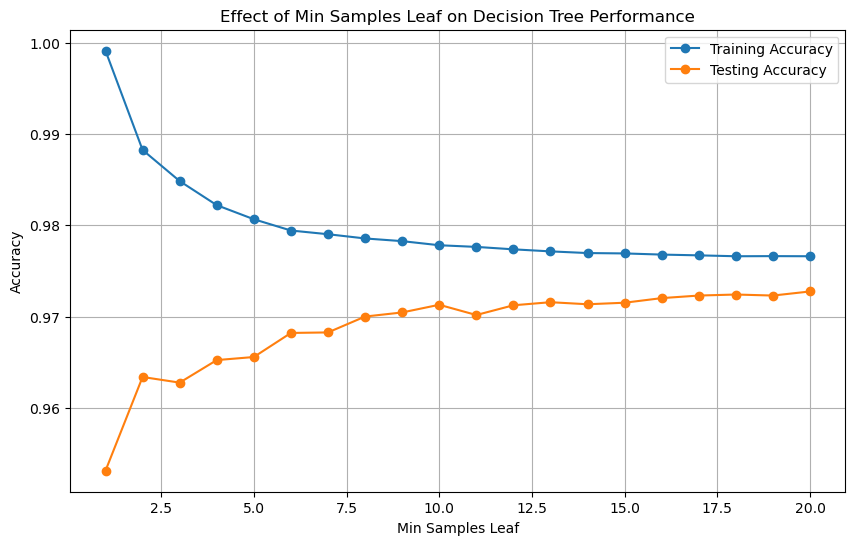

In [22]:
leaves = range(1, 21)
train_scores = []
test_scores = []

for leaf in leaves:
    decision_tree = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
    decision_tree.fit(X_train, y_train)
    train_scores.append(decision_tree.score(X_train, y_train))
    test_scores.append(decision_tree.score(X_test, y_test))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(leaves, train_scores, marker='o', label='Training Accuracy')
plt.plot(leaves, test_scores, marker='o', label='Testing Accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Effect of Min Samples Leaf on Decision Tree Performance')
plt.legend()
plt.grid()
plt.show()


## Final Model Training and Evaluation

Based on the experiments, we select optimal parameter values and train the final Decision Tree model.


Accuracy: 0.9738346033168983
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     16505
           1       1.00      0.65      0.79      1343

    accuracy                           0.97     17848
   macro avg       0.99      0.83      0.89     17848
weighted avg       0.97      0.97      0.97     17848

Confusion Matrix:
[[16505     0]
 [  467   876]]


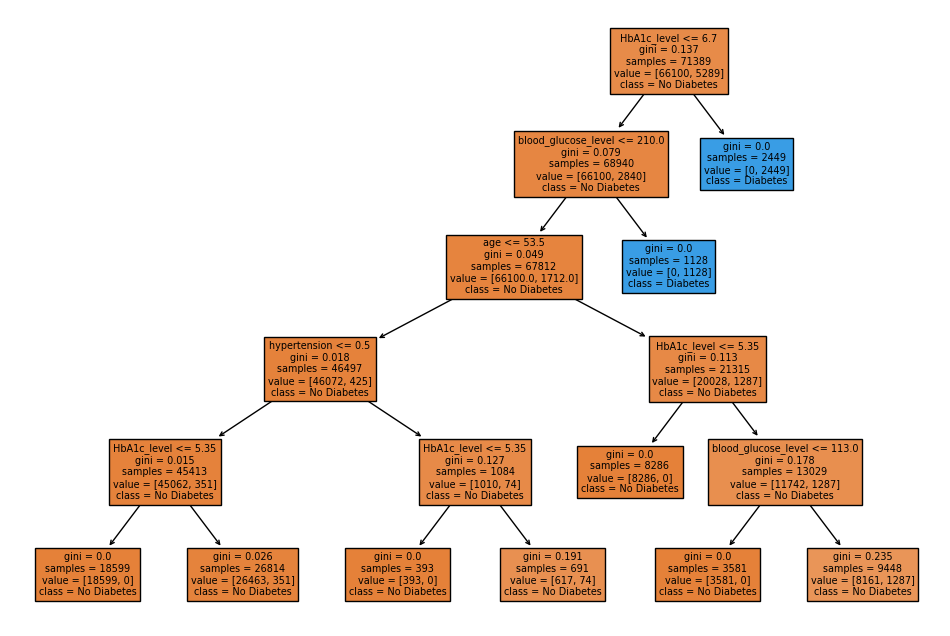

In [26]:
# Final model with selected parameters
decision_tree = DecisionTreeClassifier(
    max_depth=5,  # Adjust based on your findings
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
decision_tree.fit(X_train, y_train)

# Making predictions
y_pred = decision_tree.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)
print('Confusion Matrix:')
print(conf_matrix)

# Visualizing the final Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()


## Summary and Conclusions

In this notebook, we explored different parameters for tuning a Decision Tree model to predict diabetes. By experimenting with `max_depth`, `min_samples_split`, and `min_samples_leaf`, we aimed to balance model complexity and performance. The final model achieved an accuracy of 97.38% and provides insights into key decision factors for diabetes prediction.
